<a href="https://colab.research.google.com/github/kkleong17/Applied-Data-2-Colab/blob/main/ADS_2_tutorial_2_doneipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADS2 - Tutorial 2 - PySpark Basics
Learning Outcomes:
*   Importing data into Spark dataframes from .csv files
*   Exploring and manipulating data tables with Spark SQL
*   Write data to a file

**Methods and Functions:**


```
spark
    .read
    .sql

dataframe
    .show()
    .printSchema
```



To begin, colab doesn't come with PySpark available by default, you will need to run the filling blocks of code to install it.


In [ ]:
# Apache Spark uses Java, so first we must install that
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Download and unpack the latest version of Spark (3.2.0 as of writing)
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [ ]:
# Install findspark, which helps python locate the psyspark module files
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
# Finally, we initialse a "SparkSession", which handles the computations
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

# Exercise 1

for this tutorial, you will explore a dataset of house price data from California. The .csv for this data is available on canvas, as well as from [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices).

 * longitude
 * latitude
 * housing_median_age
 * total_rooms
 * total_bedrooms
 * population
 * households
 * median_income
 * median_house_value
 * ocean_proximity

Download the data, then upload it in the files panel on the left of the colab window. You can copy the path to this file by right-clicking it after it's uploaded.

Begin by loading the dataset into a Spark DataFrame. Certain options can to be set using the `.read.option(key, value)` methods. A full list of the options for .CSV files can be found here: [CSV Files](https://spark.apache.org/docs/latest/sql-data-sources-csv.html). Set the sperator option to commas, and the header option to True.

Finally, you need to tell the Reader where the .csv file is.

When the file is loaded, show the first 5 rows of the data and print the schema.

In [ ]:
### Load the California Housing Prices Dataset
# .read, .option, .csv
usersCsvPath = "/content/sample_data/housing.csv"

housingdf = (spark
            .read
            .option('header',True)
            .csv(usersCsvPath))



### Show the first 5 rows of data and print the schema
# .show, .printSchema
housingdf.show()
housingdf.printSchema()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

MessageError: ignored

The Schema is the database blueprint which specifies the column name, data type, whether the field is nullable, and any extra metadata. In PySpark, these are StructTypes and StructFields. You should have found that the DataFrame you loaded has only strings as the datatypes. This isn't useful for numerical data. fortunately, there are a number of ways to set the schema of a DataFrame when you load it.

The first, and simplest way, is to set the `inferSchema` option to `True` in the read call. Reload the DataFrame with this option set, and preint the schema.

In [ ]:
### Load the DataFrame again, this time with the inferSchema option enabled
housingdf = (spark
            .read
            .option('header',True)
            .option('inferSchema',True)
            .csv(usersCsvPath))
housingdf.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



For very large tables, inferring the schema can be computationally costly, as PySpark must run an additional pass over the dataset. Instead, you can set predefined schema. One way to do this is by defining a StructType, with a list individual StructFields for each column.

```
schema = StructType([StructField_1, StructField_2, ...])
```

The first StructField is provided below, complete the list for all the columns in the dataset.

Reload the DataFrame, this time replacing the inferSchema `.option()` call, with `.schema(userDefinedSchema)`. Print the new schema and check that it is correct

In [ ]:
### Load the DataFrame using a schema define with StructType and StructField
from pyspark.sql.types import DoubleType, StringType, StructType, StructField

# Complete the schema
userDefinedSchema = StructType([
    StructField(("longitude"), DoubleType(), True),
    StructField(("latitude"), DoubleType(), True),
    StructField(("housing_median_age"), DoubleType(), True),
    StructField(("total_rooms"), DoubleType(), True),
    StructField(("total_bedrooms"), DoubleType(), True),
    StructField(("population"), DoubleType(), True),
    StructField(("households"), DoubleType(), True),
    StructField(("median_income"), DoubleType(), True),
    StructField(("median_house_value"), DoubleType(), True),
    StructField(("ocean_proximity"), StringType(), True)])

### Reload the DataFrame with the new schema, then printSchema to check it
# .schema
housingdf = (spark
            .read
            .option('header',True)
            .schema(userDefinedSchema)
            .csv(usersCsvPath))

housingdf.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



Finally, you can define the schema with a DDL (Data Definition Language) string. In this case, the string defines each column name and data type pair, and can be fed into the same `.schema()` method as before. Try this now, and print the schema.

In [ ]:
### Load the DataFrame using a DLL string formatted schema
DDLSchema = "longitude double, latitude double, housing_median_age double,total_rooms double,total_bedrooms double, population double, households double, median_income double, median_house_value double,ocean_proximity string "

### Reload the DataFrame with the new schema, then printSchema to check it
housingdf = (spark
            .read
            .option('header',True)
            .schema(DDLSchema)
            .csv(usersCsvPath))
housingdf.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)



# Exercise 2

To save data stored in a DataFrame, use the `.write` method. you can save your data to a number of formats with PySpark. In addition to saving the data as a new .csv, popular formats include [Parquet files](https://parquet.apache.org/documentation/latest/) and JSON files.

Save your DataFrame as a .csv, .parquet, and .JSON file. For the parquet file, set the `.option()` `'compression', 'snappy'`. For the csv file, set the `'header', 'True'`, and `'delimeter', ','`.

In [ ]:
### Save the DataFrame as a .csv, .parquet and .JSON
# .write, .option, .csv, .parquet, .json

housingdf.write.option('header',True).option('delimiter',',').csv("/content/housingdf.csv")
housingdf.write.option('compression','snappy').parquet('/content/housingdf.parquet')
housingdf.write.json('/content/housingdf.JSON')

An alternative way to save the DataFrame is to specify the `.format()` of the file and use the `.save()` method. Repeat the previous oiperations, but this time use the `.format('string')` method, the `.mode('overwrite')` method, and the `.save('/path/to/file') method.

In [ ]:
### Use the .save() method to save the DataFrame as a .csv, .parquet and .JSON
# .write, .format, .option, .mode, .save
housingdf.write.format('csv').mode('overwrite').save('/content/housingdf.csv')
housingdf.write.format('parquet').mode('overwrite').save('/content/housingdf.parquet')
housingdf.write.format('JSON').mode('overwrite').save('/content/housingdf.JSON')

# Exercise 3

DataFrames can be manipulated using the built-in SQL API. The methods can be used to select columns from the DataFrame, apply filters and masks, sort, or group data, and much more. In this exercise, you will need the following methods:



```
.select() # one or more column names
.where() # boolean expression
.groupBy() # column name
.count()
.orderBy() # column name, ascending=True/False
```

The SQL operations aren't evaluated immediately, and return a new dataframe. By appending `.show()`, you can trigger the calculation and display the new dataframe.

In [ ]:
### Example: Select the median income and house value columns, sort by income
# .select, .orderBy/.sort

housingdf.select('median_income', 'median_house_value')\
             .orderBy('median_income').show()

+-------------+------------------+
|median_income|median_house_value|
+-------------+------------------+
|       0.4999|           73500.0|
|       0.4999|          100000.0|
|       0.4999|           56700.0|
|       0.4999|          162500.0|
|       0.4999|          112500.0|
|       0.4999|          500001.0|
|       0.4999|           90600.0|
|       0.4999|          162500.0|
|       0.4999|          500001.0|
|       0.4999|           55000.0|
|       0.4999|           82500.0|
|       0.4999|           67500.0|
|        0.536|           87500.0|
|        0.536|          162500.0|
|        0.536|           87500.0|
|        0.536|          350000.0|
|        0.536|          162500.0|
|        0.536|          375000.0|
|        0.536|          275000.0|
|        0.536|          112500.0|
+-------------+------------------+
only showing top 20 rows



In [ ]:
### Select the median house age and house value columns and order by total
### bedrooms in descending order
# .select, .orderBy/.sort

housingdf.select('median_income', 'median_house_value')\
             .orderBy('total_bedrooms').show()


+-------------+------------------+
|median_income|median_house_value|
+-------------+------------------+
|         3.25|           94800.0|
|        2.933|           85000.0|
|        4.375|          161900.0|
|       2.5234|           63500.0|
|       2.9485|           98800.0|
|       1.6196|           85100.0|
|       1.4577|           49800.0|
|       4.9489|          247100.0|
|       2.3006|           69000.0|
|         3.65|          204100.0|
|        3.625|           89500.0|
|        4.712|          158600.0|
|       5.3478|          138800.0|
|       3.2216|           98100.0|
|       1.4913|           54600.0|
|       2.5762|          173400.0|
|       3.5417|           71300.0|
|       6.7061|          322300.0|
|       3.7917|           90500.0|
|       4.7933|          186900.0|
+-------------+------------------+
only showing top 20 rows



In [ ]:
### Select median income and house value, where ocean proximity is NEAR_BAY
# .select, .filter/.where

housingdf.select('median_income', 'median_house_value')\
             .filter("ocean_proximity ==  'NEAR BAY' ").show()


+-------------+------------------+
|median_income|median_house_value|
+-------------+------------------+
|       8.3252|          452600.0|
|       8.3014|          358500.0|
|       7.2574|          352100.0|
|       5.6431|          341300.0|
|       3.8462|          342200.0|
|       4.0368|          269700.0|
|       3.6591|          299200.0|
|         3.12|          241400.0|
|       2.0804|          226700.0|
|       3.6912|          261100.0|
|       3.2031|          281500.0|
|       3.2705|          241800.0|
|        3.075|          213500.0|
|       2.6736|          191300.0|
|       1.9167|          159200.0|
|        2.125|          140000.0|
|        2.775|          152500.0|
|       2.1202|          155500.0|
|       1.9911|          158700.0|
|       2.6033|          162900.0|
+-------------+------------------+
only showing top 20 rows



In [ ]:
### Count the number of entries where population > 500
# .filter/.where, .count
housingdf.select('population').filter("population > 500").count()

18660

In [ ]:
### Group by ocean proximity and count the number of entries in each category
# .groupBy, .count
housingdf.groupBy('ocean_proximity').count()

DataFrame[ocean_proximity: string, count: bigint]

# Exercise 4

The `Column` class is another way to access and manipulate the data within the DataFrame. You can use Columns to form complex expressions, such as:
```
col('total_bedrooms') / col('total_rooms')
col('median_house_value').desc()
(col('median_income')*1000).cast('int')
```
For the following tasks, use Column objects in the DataFrame transformations. Create a new DataFrame for each task, and show the contents.

In [ ]:
### Example: Create a DataFrame with only rows where population > 500, include
### a column with the number of bedrooms / total number of rooms, and sort by
### descending house value
# col, .filter/.where, withColumn, .orderBy/.sort, desc
from pyspark.sql.functions import col

# Column expression to calculate ratio of bedrooms and rooms
bedsperroom = col('total_bedrooms') / col('total_rooms')

# Filter by population, add new column, sort DF
bedsperroomDF = housingdf.filter(col('population') > 500)\
                             .withColumn('beds_per_room', bedsperroom)\
                             .sort(col('median_house_value').desc())

bedsperroomDF.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|      beds_per_room|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-------------------+
|   -122.0|   37.84|              16.0|     7681.0|         946.0|    2777.0|     908.0|       9.5271|          500001.0|      <1H OCEAN| 0.1231610467387059|
|  -118.54|   34.28|              10.0|     7665.0|         999.0|    3517.0|     998.0|      10.8805|          500001.0|      <1H OCEAN|0.13033268101761253|
|  -121.96|   37.85|              10.0|     3209.0|         379.0|    1199.0|     392.0|      12.2478|          500001.0|         INLAND|0.11810532876285447|
|  -122.25|   37.87|              52.0|      609.0| 

In [ ]:
### Select the population and median house value where
### the median house age is < 20, store the result as a new DataFrame
# col, .select, .where
media=(col('housing_median_age') < 20)

popmed=housingdf.select('population','housing_median_age').where(media).show()

+----------+------------------+
|population|housing_median_age|
+----------+------------------+
|      94.0|               2.0|
|     762.0|              17.0|
|     721.0|              19.0|
|     609.0|              17.0|
|     546.0|              10.0|
|     125.0|              10.0|
|     800.0|              16.0|
|     533.0|              18.0|
|    1481.0|              19.0|
|    2420.0|              15.0|
|     228.0|              10.0|
|    3100.0|              14.0|
|     959.0|              13.0|
|    1243.0|              18.0|
|    7427.0|               5.0|
|    5781.0|              12.0|
|    1738.0|               5.0|
|    1479.0|              15.0|
|     814.0|               5.0|
|     877.0|              10.0|
+----------+------------------+
only showing top 20 rows



In [ ]:
### Create a new DataFrame where the ocean proximity column has been dropped.
# col, .drop
oc_df=col('ocean_proximity').drop

In [ ]:
### Create a DataFrame which includes a new column for population per household,
### sort by that column, and rename 'ocean_proximity' to 'location'
# col, .withColumn, .withColumnRenamed, .sort/.orderBy
pophouse=col('population')/col('households')

popdf=housingdf.withColumn('pop per household',pophouse).withColumnRenamed('ocean_proximity','location').sort(col('pop per household')).show()
              


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+----------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|  location| pop per household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+----------+------------------+
|   -121.0|   39.75|               8.0|     1116.0|         214.0|      27.0|      39.0|       2.5893|           83000.0|    INLAND|0.6923076923076923|
|  -118.44|   34.04|              16.0|       18.0|           6.0|       3.0|       4.0|        0.536|          350000.0| <1H OCEAN|              0.75|
|   -121.0|   37.65|              17.0|      484.0|         202.0|     198.0|     204.0|       0.6825|          187500.0|    INLAND|0.9705882352941176|
|   -121.0|   37.71|              52.0|      102.0|          23.0|      35.0|      33.0|

In [ ]:
### Create a DataFrame with the null values in total_bedrooms removed
# col, .isNotNull, .where/.filter
dffs=col('total_bedrooms').isNotNull

ho=housingdf.where(col('total_bedrooms').isNotNull()).show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

Text(0.5, 1.0, 'Longitude vs Latitude')

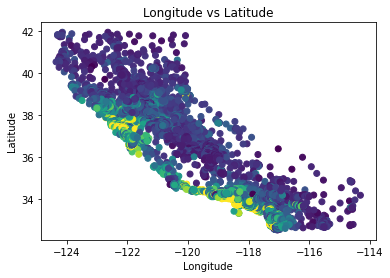

In [ ]:
### Using the collect method to return the listed values of a column, create a
### scatter plot in matplotlib with 'longitude' vs 'latitude', coloured by the
### 'median_house_value'. Include appropriate axis labels, and a labelled
### colour bar.
# .select, .collect, .scatter, .colorbar
import matplotlib.pyplot as plt



longitude = housingdf.select(col('longitude')).collect()
latitude = housingdf.select(col('latitude')).collect()
house_value = housingdf.select(col('median_house_value')).collect()

plt.scatter(longitude,latitude,c=house_value)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Longitude vs Latitude')